# Optimus 20MW Wind Turbine
This code runs foxes algorith for Optimus 20MW wind turbine. 

# Adding my wind farm

['randomized_test_farm_67.csv', 'test_farm_67.csv']


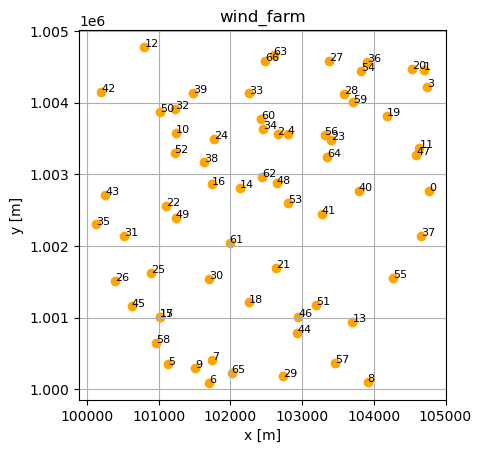

In [2]:
import pandas as pd
import numpy as np
import foxes
import matplotlib.pyplot as plt
import foxes.variables as FV,

# Step 1: Read the CSV file
file_path = 'foxes/foxes/data/farms/test_farm_67.csv'
df = pd.read_csv(file_path)

# Step 2: Generate Randomized Data
def generate_randomized_turbines(df, num_turbines):
    randomized_data = []
    for i in range(num_turbines):
        label = f"T{i}"
        x = np.random.uniform(df['x'].min(), df['x'].max())
        y = np.random.uniform(df['y'].min(), df['y'].max())
        randomized_data.append([i, label, x, y])
    return pd.DataFrame(randomized_data, columns=['index', 'label', 'x', 'y'])

# Generate 67 randomized turbines
randomized_df = generate_randomized_turbines(df, 67)

# Step 3: Write to a new CSV file
randomized_file_path = 'foxes/foxes/data/farms/randomized_test_farm_67.csv'
randomized_df.to_csv(randomized_file_path, index=False)

# Step 4: Add the new file to the DataBook context
dbook = foxes.StaticData()
dbook.add_file('farm', randomized_file_path)

# Verify the file is added to the context
print(dbook.toc('farm'))

# Load the new farm layout
farm = foxes.WindFarm()
foxes.input.farm_layout.add_from_file(
    farm, 'foxes/foxes/data/farms/randomized_test_farm_67.csv', turbine_models=[], verbosity=0
)
foxes.output.FarmLayoutOutput(farm).get_figure()
plt.show()

# Adding my wind turbine

You need to create a csv file with the power and thrust coefficient curves of your wind turbine. The csv file should have three columns: wind_speed and power_coefficient, thrust_coefficient. 

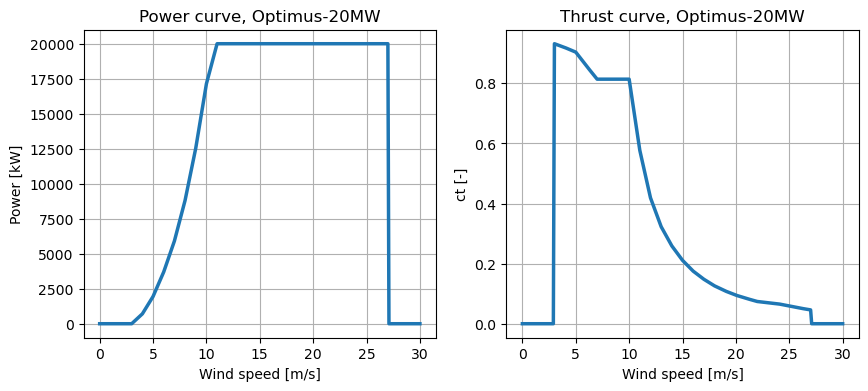

In [19]:
import foxes
import matplotlib.pyplot as plt
import foxes.variables as FV



# Step 1: Create a ModelBook instance
mbook = foxes.models.ModelBook()

# Step 2: Add a turbine model from a CSV file
# Ensure the file path is correct
csv_file_path = 'foxes/foxes/data/power_ct_curves/Optimus-20MW-D295-H160.csv'
mbook.turbine_types["Optimus-20MW"] = foxes.models.turbine_types.PCtFile(csv_file_path)

# Step 3: Verify the addition by plotting the curves
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
o = foxes.output.TurbineTypeCurves(mbook)
o.plot_curves("Optimus-20MW", [FV.P, FV.CT], axs=axs)
plt.show()


Point results:
 <xarray.Dataset>
Dimensions:  (state: 1, point: 8000)
Coordinates:
  * state    (state) int32 0
Dimensions without coordinates: point
Data variables:
    WD       (state, point) float64 270.0 270.0 270.0 ... 270.0 270.0 270.0
    RHO      (state, point) float64 1.225 1.225 1.225 ... 1.225 1.225 1.225
    WS       (state, point) float64 9.0 9.0 9.0 9.0 ... 8.916 8.916 8.916 8.916
    TI       (state, point) float64 0.12 0.12 0.12 0.12 ... 0.12 0.12 0.12 0.12
    AMB_WD   (state, point) float64 270.0 270.0 270.0 ... 270.0 270.0 270.0
    AMB_RHO  (state, point) float64 1.225 1.225 1.225 ... 1.225 1.225 1.225
    AMB_WS   (state, point) float64 9.0 9.0 9.0 9.0 9.0 ... 9.0 9.0 9.0 9.0 9.0
    AMB_TI   (state, point) float64 0.12 0.12 0.12 0.12 ... 0.12 0.12 0.12 0.12


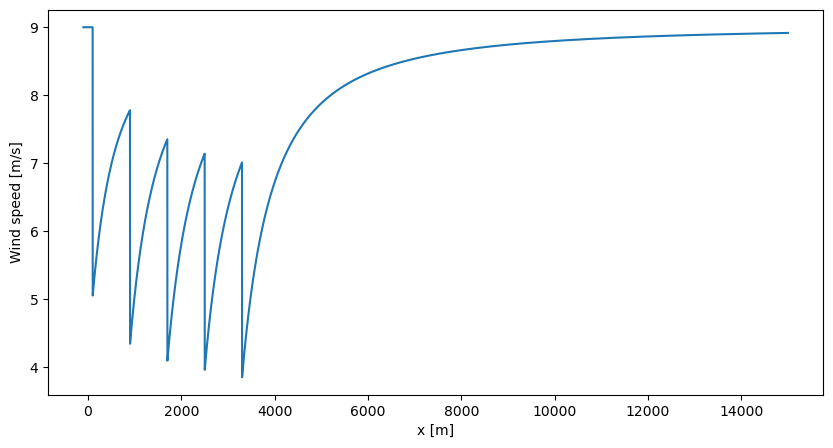

In [22]:
H = mbook.turbine_types["Optimus-20MW"].H

# create points of interest, shape (n_states, n_points, 3):
n_points = 8000
points = np.zeros((1, n_points, 3))
points[:, :, 0] = np.linspace(-100.0, 15000.0, n_points)[None, :]
points[:, :, 2] = H

# calculate point results:
point_results = algo.calc_points(farm_results, points)
print("\nPoint results:\n", point_results)

# create figure:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(points[0, :, 0], point_results[FV.WS][0, :])
ax.set_xlabel("x [m]")
ax.set_ylabel("Wind speed [m/s]")
plt.show()

# Addding wind data
Create a StatesRosePlotOutput object:  
o = foxes.output.StatesRosePlotOutput(states, point=[0., 0., 100.])
This line initializes a StatesRosePlotOutput object with the variable o.
It takes two parameters:
states, which is a MultiHeightTimeseries object containing wind data (wind speed, wind direction, turbulence intensity, and air density at various heights).
point=[0., 0., 100.], which specifies the coordinates (x, y, z) for the location of interest. Here, it's set to a point 100 meters above ground level, assuming the origin (0, 0) on the ground.
Generate the figure:  
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
This line generates a matplotlib figure object using the get_figure method of the StatesRosePlotOutput object.
The parameters are:
16, which specifies the number of wind direction sectors (bins) for the rose plot.
FV.AMB_WS, which indicates that the ambient wind speed (AMB_WS) is the variable of interest for the plot.
[0, 3.5, 6, 10, 15, 20], which defines the wind speed bins (in m/s) for categorizing the wind data in the plot.
figsize=(6, 6), which sets the size of the figure to 6x6 inches.

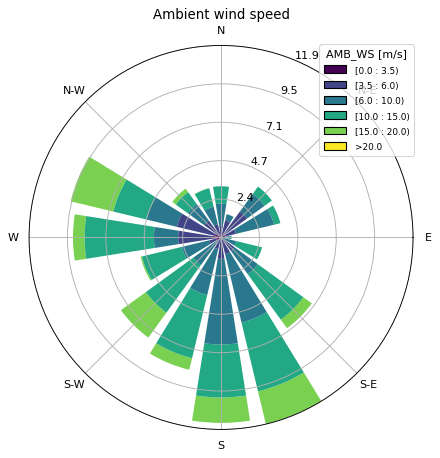

In [4]:
states = foxes.input.states.MultiHeightTimeseries(
    data_source="WRF-Timeseries-4464.csv.gz",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    heights=[50, 75, 90, 100, 150, 200, 250, 500],
    fixed_vars={FV.TI: 0.05},
)

o = foxes.output.StatesRosePlotOutput(states, point=[0., 0., 150.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

In [5]:
Ny = 1000
ws0 = 9.0

sdata = pd.DataFrame(index=range(Ny + 1))
sdata.index.name = "state"
sdata["ws"] = ws0
sdata["wd"] = 270
sdata["ti"] = 0.05
sdata["rho"] = 1.225
sdata["y"] = np.linspace(-500, 500, Ny + 1)

sdata

,ws,wd,ti,rho,y
state,,,,,
0,9.0,270,0.05,1.225,-500.0
1,9.0,270,0.05,1.225,-499.0
2,9.0,270,0.05,1.225,-498.0
3,9.0,270,0.05,1.225,-497.0
4,9.0,270,0.05,1.225,-496.0
...,...,...,...,...,...
996,9.0,270,0.05,1.225,496.0
997,9.0,270,0.05,1.225,497.0
998,9.0,270,0.05,1.225,498.0


In [39]:
def calc(rotor, pwake, wake, turbine:str , path):   
    mbook = foxes.ModelBook()
    mbook.turbine_types[turbine] = foxes.models.turbine_types.PCtFile(
        path
    )
    states = foxes.input.states.StatesTable(
        sdata,
        output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
        var2col={FV.WS: "ws", FV.WD: "wd", FV.TI: "ti", FV.RHO: "rho"},
    )

    ydata = np.full((len(sdata.index), 2), np.nan)
    ydata[:, 1] = sdata["y"].to_numpy()

    ttype=turbine
    
    mbook.turbine_models["sety"] = foxes.models.turbine_models.SetFarmVars(
        pre_rotor=True
    )
    mbook.turbine_models["sety"].add_var(FV.Y, ydata)
    D = mbook.turbine_types[ttype].D

    farm = foxes.WindFarm()
    farm.add_turbine(
        foxes.Turbine(
            xy=np.array([0.0, 0.0]), 
            turbine_models=[ttype]
        ),
        verbosity=0,
    )
    farm.add_turbine(
        foxes.Turbine(
            xy=np.array([4*D, 0.0]),
            turbine_models=["sety", ttype],
        ),
        verbosity=0,
    )

    algo = foxes.algorithms.Downwind(
        farm,
        states,
        wake_models=[wake],
        rotor_model=rotor,
        partial_wakes=pwake,
        mbook=mbook,
        verbosity=0,
    )

    print(f"Calculating rotor = {rotor}, pwake = {pwake}")
    farm_results = algo.calc_farm()

    return farm_results, D

In [40]:
def run_calc( rotor, pwakes, wake, turbine:str, path):
    mbook = foxes.models.ModelBook()

    # Step 2: Add a turbine model from a CSV file
    # Ensure the file path is correct
    csv_file_path = 'foxes/foxes/data/power_ct_curves/Optimus-20MW-D295-H160.csv'
    mbook.turbine_types["Optimus-20MW"] = foxes.models.turbine_types.PCtFile(csv_file_path)
    results = {}
    for pwake in pwakes:
        farm_results, D = calc(rotor, pwake, wake, turbine, path)
        results[pwake] = farm_results
    return results, D

In [8]:
def get_plot(results, D, rotor, figsize=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize)

    for pwake, fres in results.items():
        ls = "--" if pwake=="rotor_points" else "-"
        lw = 3 if pwake=="rotor_points" else 2
        ax.plot(
            fres[FV.Y][:, 1]/D,
            fres[FV.REWS][:, 1]/ws0,
            linestyle=ls,
            linewidth=lw,
            alpha=0.8,
            label=pwake,
        )

    title = f"4D behind the rotor, ws0 = {ws0} m/s, rotor = {rotor}"
    ax.set_title(title)
    ax.set_xlabel("y/D")
    ax.legend()

    return ax

In [37]:
# Ensure the file path is correct
mbook = foxes.models.ModelBook()

# Step 2: Add a turbine model from a CSV file
# Ensure the file path is correct
csv_file_path = 'foxes/foxes/data/power_ct_curves/Optimus-20MW-D295-H160.csv'
mbook.turbine_types["Optimus-20MW"] = foxes.models.turbine_types.PCtFile(csv_file_path)
print(list(mbook.turbine_types.keys()))

['null_type', 'NREL5MW', 'DTU10MW', 'IEA15MW', 'IWT7.5MW', 'Optimus-20MW']


Calculating rotor = grid400, pwake = rotor_points
Calculating rotor = grid400, pwake = centre
Calculating rotor = grid400, pwake = grid4
Calculating rotor = grid400, pwake = grid9
Calculating rotor = grid400, pwake = grid16
Calculating rotor = grid400, pwake = grid100


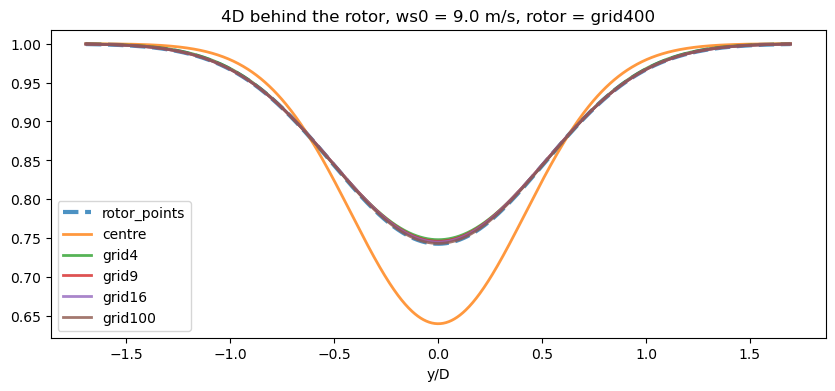

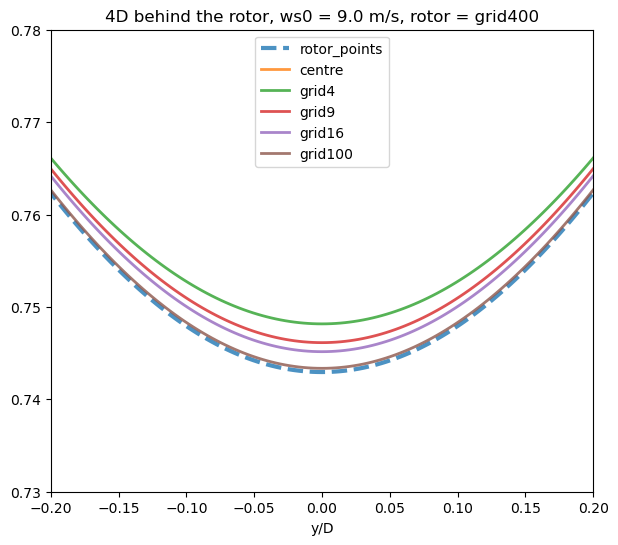

In [41]:

# Now proceed with calculations
# Ensure the rest of your code uses the same `mbook` instance
rotor = "grid400"
wake = "Bastankhah2014_linear_k004"
pwakes = ["rotor_points", "centre", "grid4", "grid9", "grid16", "grid100"]
results, D = run_calc(rotor, pwakes, wake, "Optimus-20MW" , csv_file_path)

ax = get_plot(results, D, rotor)
plt.show()

ax = get_plot(results, D, rotor, figsize=(7, 6))
ax.set_xlim(-0.2, 0.2)
ax.set_ylim(0.73, 0.78)
ax.legend(loc="upper center")
plt.show()

In [48]:
# Create model book and add turbine type model:
# The csv file will be searched in the file system,
# and if not found, taken from static library.
#
# Note that we could actually skip adding the "NREL5"
# model and use "NREL5MW" which already exists in the
# default model book. Here this is for demonstrational
# purposes, in case you have your own turbine file:
mbook = foxes.ModelBook()
mbook.turbine_types["Optimus-20MW"] = foxes.models.turbine_types.PCtFile(
    "foxes/foxes/data/power_ct_curves/Optimus-20MW-D295-H160.csv"
)

# create ambient wind conditions, a single uniform state:
states = foxes.input.states.SingleStateStates(ws=9.0, wd=270.0, ti=0.12, rho=1.225)

# create wind farm, a single row of turbines:
farm = foxes.WindFarm()
foxes.input.farm_layout.add_row(
    farm=farm,
    xy_base=[0.0, 0.0],
    xy_step=[800.0, 0.0],
    n_turbines=5,
    turbine_models=["Optimus-20MW"],
    verbosity=0,
)

# setup the calculation algorithm:
algo = foxes.algorithms.Downwind(
    farm, states, wake_models=["Jensen_linear_k007"], mbook=mbook, verbosity=0,
)

In [49]:

farm_results = algo.calc_farm()
print("\nFarm results:\n", farm_results)


Farm results:
 <xarray.Dataset>
Dimensions:     (state: 1, turbine: 5)
Coordinates:
  * state       (state) int32 0
Dimensions without coordinates: turbine
Data variables: (12/27)
    AMB_CT      (state, turbine) float64 0.814 0.814 0.814 0.814 0.814
    AMB_P       (state, turbine) float64 1.254e+04 1.254e+04 ... 1.254e+04
    AMB_REWS    (state, turbine) float64 9.0 9.0 9.0 9.0 9.0
    AMB_REWS2   (state, turbine) float64 9.0 9.0 9.0 9.0 9.0
    AMB_REWS3   (state, turbine) float64 9.0 9.0 9.0 9.0 9.0
    AMB_RHO     (state, turbine) float64 1.225 1.225 1.225 1.225 1.225
    ...          ...
    YAW         (state, turbine) float64 270.0 270.0 270.0 270.0 270.0
    order       (state, turbine) int64 0 1 2 3 4
    order_inv   (state, turbine) int64 0 1 2 3 4
    order_ssel  (state, turbine) int64 0 0 0 0 0
    weight      (state, turbine) float64 1.0 1.0 1.0 1.0 1.0
    tname       (turbine) <U2 'T0' 'T1' 'T2' 'T3' 'T4'



Point results:
 <xarray.Dataset>
Dimensions:  (state: 1, point: 8000)
Coordinates:
  * state    (state) int32 0
Dimensions without coordinates: point
Data variables:
    WD       (state, point) float64 270.0 270.0 270.0 ... 270.0 270.0 270.0
    RHO      (state, point) float64 1.225 1.225 1.225 ... 1.225 1.225 1.225
    WS       (state, point) float64 9.0 9.0 9.0 9.0 ... 8.652 8.652 8.653 8.653
    TI       (state, point) float64 0.12 0.12 0.12 0.12 ... 0.12 0.12 0.12 0.12
    AMB_WD   (state, point) float64 270.0 270.0 270.0 ... 270.0 270.0 270.0
    AMB_RHO  (state, point) float64 1.225 1.225 1.225 ... 1.225 1.225 1.225
    AMB_WS   (state, point) float64 9.0 9.0 9.0 9.0 9.0 ... 9.0 9.0 9.0 9.0 9.0
    AMB_TI   (state, point) float64 0.12 0.12 0.12 0.12 ... 0.12 0.12 0.12 0.12


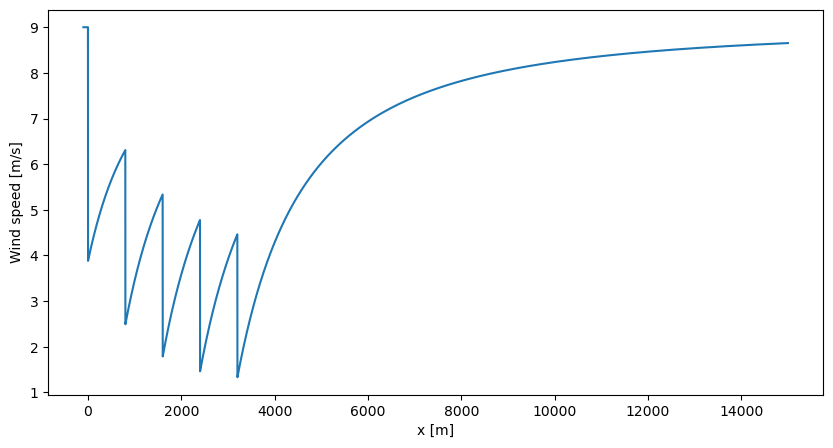

In [50]:

# infer hub height from turbine type:
H = mbook.turbine_types["Optimus-20MW"].H

# create points of interest, shape (n_states, n_points, 3):
n_points = 8000
points = np.zeros((1, n_points, 3))
points[:, :, 0] = np.linspace(-100.0, 15000.0, n_points)[None, :]
points[:, :, 2] = H

# calculate point results:
point_results = algo.calc_points(farm_results, points)
print("\nPoint results:\n", point_results)

# create figure:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(points[0, :, 0], point_results[FV.WS][0, :])
ax.set_xlabel("x [m]")
ax.set_ylabel("Wind speed [m/s]")
plt.show()

In [51]:
R = mbook.turbine_types["Optimus-20MW"].D
print(R)

295.0


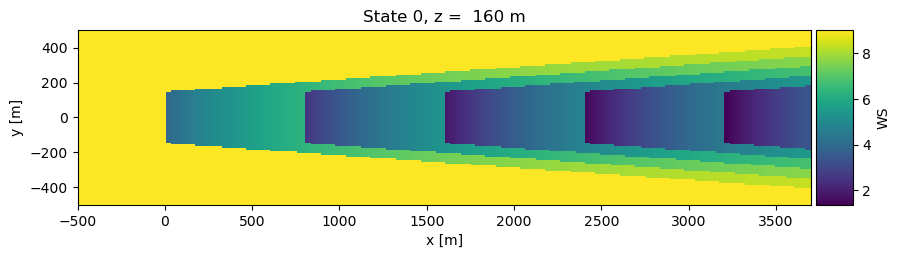

In [52]:
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_xy("WS", resolution=10, figsize=(10, 5), verbosity=0)
fig = next(g)  # creates the figure for the next state, here there is only state 0
plt.show()

In [53]:
mbook = foxes.models.ModelBook()
mbook.print_toc()

axial_induction
---------------
Betz: BetzAxialInduction()
Madsen: MadsenAxialInduction()

farm_controllers
----------------
basic_ctrl: BasicFarmController()

farm_models
-----------
farm_PMask: Turbine2FarmModel(PowerMask(var_ws_P=REWS3, P_lim=100, induction=Betz))
farm_hubh_data: Turbine2FarmModel(RotorCentreCalc())
farm_kTI: Turbine2FarmModel(kTI(kTI=None, kb=0, ti_var=TI, k_var=k))
farm_kTI_amb: Turbine2FarmModel(kTI(kTI=None, kb=0, ti_var=AMB_TI, k_var=k))
farm_thrust2ct: Turbine2FarmModel(Thrust2Ct(thrust_var=T, var_ws_ct=REWS2))
farm_yaw2yawm: Turbine2FarmModel(YAW2YAWM())
farm_yawm2yaw: Turbine2FarmModel(YAWM2YAW())

ground_models
-------------
ground_mirror: GroundMirror()
no_ground: NoGround()

blh_mirror_h<height>: WakeMirror with
  height=(Boundary layer wake reflection height)

partial_wakes
-------------
centre: PartialCentre()
rotor_points: RotorPoints()
top_hat: PartialTopHat()

axiwake<n>: PartialAxiwake with
  n=(Number of evaluation points)

grid<n2>: PartialGrid wi

This example demonstrates wake modelling for yawed wind turbine rotors, following [Bastankhah & Porte-Agel](https://doi.org/10.1017/jfm.2016.595). Let's start by importing the required packages:


In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import foxes
import foxes.variables as FV
import foxes.constants as FC

In [75]:
sdata = pd.DataFrame(index=range(3))
sdata[FV.WS] = 8.0
sdata[FV.WD] = 270.0
sdata

,WS,WD
0,8.0,270.0
1,8.0,270.0
2,8.0,270.0


In [76]:
states = foxes.input.states.StatesTable(
    data_source=sdata,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

In [67]:
yawm = np.array([
    [30.0, 0.0], [0.0, 0.0], [-30.0, 0.0]
])
yawm

array([[ 30.,   0.],
       [  0.,   0.],
       [-30.,   0.]])

In [77]:
mbook = foxes.models.ModelBook()
csv_file_path = 'foxes/foxes/data/power_ct_curves/Optimus-20MW-D295-H160.csv'
mbook.turbine_types["Optimus-20MW"] = foxes.models.turbine_types.PCtFile(csv_file_path)
mbook.turbine_models["set_yawm"] = foxes.models.turbine_models.SetFarmVars()
mbook.turbine_models["set_yawm"].add_var(FV.YAWM, yawm)
print(mbook.turbine_models["set_yawm"])

SetFarmVars()


In [78]:
farm = foxes.WindFarm()
farm.add_turbine(
    foxes.Turbine(
        xy=[0.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "Optimus-20MW", "kTI_05"],
    )
)
farm.add_turbine(
    foxes.Turbine(
        xy=[1000.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "Optimus-20MW", "kTI_05"],
    )
)

Turbine 0, T0: xy=(0.00, 0.00), set_yawm, yawm2yaw, Optimus-20MW, kTI_05
Turbine 1, T1: xy=(1000.00, 0.00), set_yawm, yawm2yaw, Optimus-20MW, kTI_05


In [79]:

algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah2016_linear", "IECTI2019_max"],
    wake_frame="yawed",
    mbook=mbook,
    chunks=None,
    verbosity=0,
)

In [80]:
farm_results = algo.calc_farm()

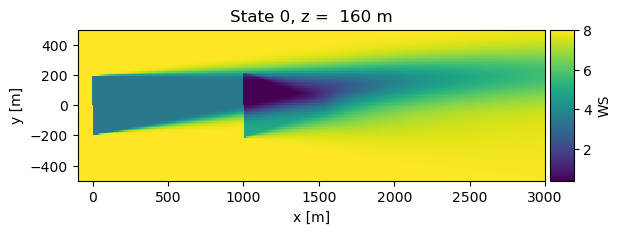

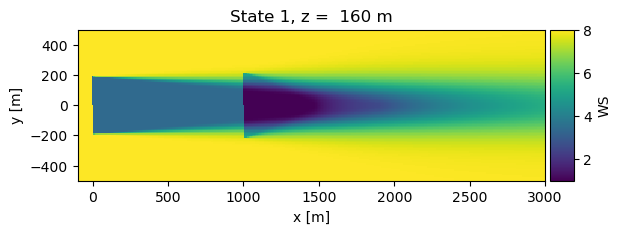

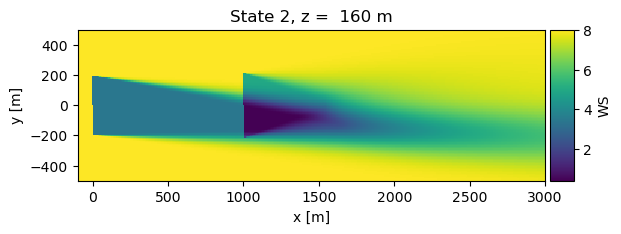

In [81]:
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_xy(FV.WS, resolution=10, xmin=-100, xmax=3000, verbosity=0)
for fig in g:
    plt.show()

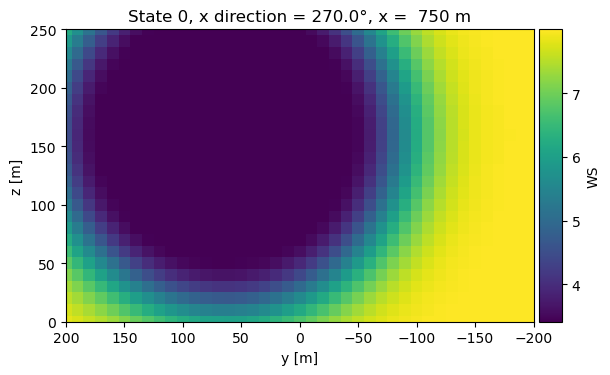

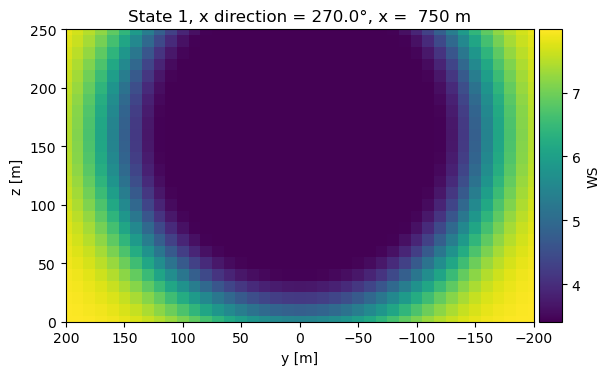

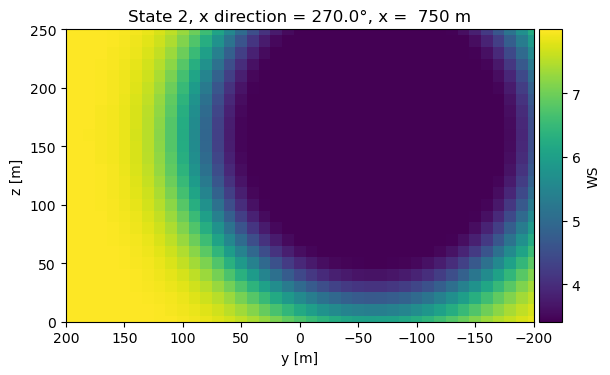

In [82]:
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_yz(FV.WS, resolution=10, x=750, ymin=-200,ymax=200,zmin=0,zmax=250,verbosity=0)
for fig in g:
    plt.show()

In [83]:
farm_df = farm_results.to_dataframe()
print("\nFarm results:\n")
print(farm_df[[FV.X, FV.WD, FV.YAW, FV.YAWM, FV.REWS]])


Farm results:

                    X     WD    YAW  YAWM      REWS
state turbine                                      
0     0           0.0  270.0  300.0  30.0  8.000000
      1        1000.0  270.0  270.0   0.0  4.415849
1     0           0.0  270.0  270.0   0.0  8.000000
      1        1000.0  270.0  270.0   0.0  3.440593
2     0           0.0  270.0  240.0 -30.0  8.000000
      1        1000.0  270.0  270.0   0.0  4.415849


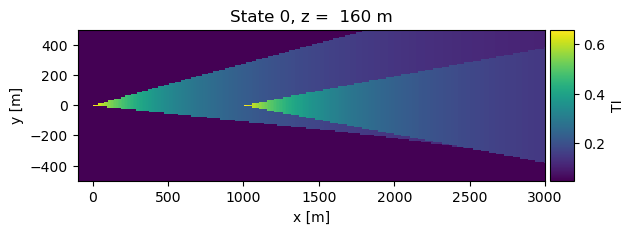

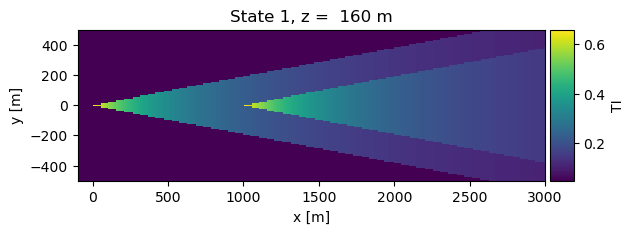

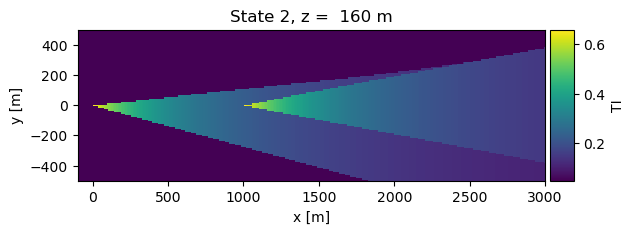

In [84]:
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_xy(FV.TI, resolution=10, xmin=-100, xmax=3000, verbosity=0)
for fig in g:
    plt.show()